In [201]:
import pandas as pd
financial_history = pd.read_csv('financial_results.csv')
financial_history['revtq'] = financial_history['revtq'] * 1000000
financial_history['niq'] = financial_history['niq'] * 1000000
financial_history['revty'] = financial_history['revty'] * 1000000
financial_history['niy'] = financial_history['niy'] * 1000000
financial_history = financial_history[(financial_history['revtq'] >= 15000000)]
financial_history


,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,cusip,...,epspxq,niq,revtq,niy,revty,costat,ggroup,gind,gsector,gsubind
0,1013,19950131,1995,1.0,INDL,C,D,STD,ADCT.1,000886309,...,0.38,10466000.0,121774000.0,10466000.0,121774000.0,I,4520,452010,45,45201020
1,1013,19950430,1995,2.0,INDL,C,D,STD,ADCT.1,000886309,...,0.18,10389000.0,140342000.0,NaN,NaN,I,4520,452010,45,45201020
2,1013,19950731,1995,3.0,INDL,C,D,STD,ADCT.1,000886309,...,0.26,15674000.0,150454000.0,NaN,NaN,I,4520,452010,45,45201020
3,1013,19951031,1995,4.0,INDL,C,D,STD,ADCT.1,000886309,...,0.30,18657000.0,173652000.0,NaN,NaN,I,4520,452010,45,45201020
4,1013,19960131,1996,1.0,INDL,C,D,STD,ADCT.1,000886309,...,0.26,16313000.0,162591000.0,16313000.0,162591000.0,I,4520,452010,45,45201020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194161,347085,20210228,2020,4.0,INDL,C,D,STD,KARO,Y4600W108,...,0.20,4228000.0,42641000.0,20965000.0,150924000.0,A,4510,451030,45,45103010
194162,347085,20210531,2021,1.0,INDL,C,D,STD,KARO,Y4600W108,...,0.25,6417000.0,45522000.0,6417000.0,45522000.0,A,4510,451030,45,45103010
194163,347085,20210831,2021,2.0,INDL,C,D,STD,KARO,Y4600W108,...,0.26,7888000.0,43099000.0,14305000.0,88621000.0,A,4510,451030,45,45103010
194164,347085,20211130,2021,3.0,INDL,C,D,STD,KARO,Y4600W108,...,0.25,7768000.0,36496000.0,22073000.0,125117000.0,A,4510,451030,45,45103010


In [202]:
# financial_history['RevenueGrowthRate'] = financial_history['revtq'].pct_change(periods=4)
# sort values by id and quarter
# shift by negative 4
# check borders (make sure you are heetoi
import numpy as np
from scipy import stats
financial_history['RevenueGrowthRate'] = financial_history.groupby(['cusip'])['revtq'].pct_change(periods=4)
financial_history = financial_history.dropna()
financial_history = financial_history.drop(financial_history[financial_history.RevenueGrowthRate == float('inf')].index)
financial_history = financial_history.drop(financial_history[financial_history.RevenueGrowthRate == float('-inf')].index)
financial_history['NetProfitMargin'] = financial_history['niq']/financial_history['revtq']
financial_history = financial_history.drop(financial_history[financial_history.NetProfitMargin == float('inf')].index)
financial_history = financial_history.dropna()
financial_history['gp_score'] = financial_history['NetProfitMargin'] + financial_history['RevenueGrowthRate']
def create_forward_quarter(row):
    cq = row['datacqtr']
    year = cq[0:4]
    quarter = cq[4:]
    if quarter == 'Q1':
        return year + 'Q2'
    elif quarter == 'Q2':
        return year + 'Q3'
    elif quarter == 'Q3':
        return year + 'Q4'
    elif quarter == 'Q4':
        year = str(int(year) + 1)
        return year + 'Q1'
financial_history['forward_c_qtr'] = financial_history.apply(create_forward_quarter, axis=1)
financial_history

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,cusip,...,revty,costat,ggroup,gind,gsector,gsubind,RevenueGrowthRate,NetProfitMargin,gp_score,forward_c_qtr
4,1013,19960131,1996,1.0,INDL,C,D,STD,ADCT.1,000886309,...,162591000.0,I,4520,452010,45,45201020,0.335186,0.100332,0.435518,1996Q1
5,1013,19960430,1996,2.0,INDL,C,D,STD,ADCT.1,000886309,...,355644000.0,I,4520,452010,45,45201020,0.375590,0.103075,0.478665,1996Q2
6,1013,19960731,1996,3.0,INDL,C,D,STD,ADCT.1,000886309,...,572957000.0,I,4520,452010,45,45201020,0.444382,0.106630,0.551011,1996Q3
7,1013,19961031,1996,4.0,INDL,C,D,STD,ADCT.1,000886309,...,828009000.0,I,4520,452010,45,45201020,0.468754,0.110091,0.578845,1996Q4
8,1013,19970131,1997,1.0,INDL,C,D,STD,ADCT.1,000886309,...,256777000.0,I,4520,452010,45,45201020,0.579282,0.040483,0.619764,1997Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194161,347085,20210228,2020,4.0,INDL,C,D,STD,KARO,Y4600W108,...,150924000.0,A,4510,451030,45,45103010,-0.655309,0.099153,-0.556156,2021Q2
194162,347085,20210531,2021,1.0,INDL,C,D,STD,KARO,Y4600W108,...,45522000.0,A,4510,451030,45,45103010,0.501583,0.140965,0.642548,2021Q3
194163,347085,20210831,2021,2.0,INDL,C,D,STD,KARO,Y4600W108,...,88621000.0,A,4510,451030,45,45103010,0.279928,0.183020,0.462948,2021Q4
194164,347085,20211130,2021,3.0,INDL,C,D,STD,KARO,Y4600W108,...,125117000.0,A,4510,451030,45,45103010,-0.176051,0.212845,0.036794,2022Q1


In [203]:
market_cap_history = pd.read_csv('market-cap-history.csv')
market_cap_history['Year'] = market_cap_history['MthCalDt'] // 10000
market_cap_history['Month'] = market_cap_history['MthCalDt'].map(str)
market_cap_history['Month'] = market_cap_history['Month'].str[4:8]
market_cap_history['Month'] = market_cap_history['Month'].map(int)
def assign_quarter(row):
    if row['Month'] < 400:
        return 'Q1'
    elif row['Month'] < 700:
        return 'Q2'
    elif row['Month'] < 1000:
        return 'Q3'
    else:
        return 'Q4'
market_cap_history['Quarter'] = market_cap_history.apply(assign_quarter, axis=1)
market_cap_history['Year'] = market_cap_history['Year'].map(str)
market_cap_history['forward_c_qtr'] = market_cap_history['Year'] + market_cap_history['Quarter']
market_cap_history['MthCap'] = market_cap_history['MthCap'].str.replace(',', '')
market_cap_history['MthCap'] = market_cap_history['MthCap'].map(float)
market_cap_history

,HdrCUSIP9,Ticker,ICBIndustry,MthCalDt,MthCap,Year,Month,Quarter,forward_c_qtr
0,233269109,DPAC,NOAVAIL,19950131,32899.50,1995,131,Q1,1995Q1
1,233269109,DPAC,NOAVAIL,19950228,31994.38,1995,228,Q1,1995Q1
2,233269109,DPAC,NOAVAIL,19950331,31537.31,1995,331,Q1,1995Q1
3,233269109,DPAC,NOAVAIL,19950428,29252.00,1995,428,Q2,1995Q2
4,233269109,DPAC,NOAVAIL,19950531,29270.00,1995,531,Q2,1995Q2
...,...,...,...,...,...,...,...,...,...
375531,695255109,PACT,TECH,20131129,535518.72,2013,1129,Q4,2013Q4
375532,695255109,PACT,TECH,20131231,543886.20,2013,1231,Q4,2013Q4
375533,695255109,PACT,TECH,20140131,544646.88,2014,131,Q1,2014Q1
375534,695255109,PACT,TECH,20140228,547689.60,2014,228,Q1,2014Q1


In [204]:
quarterly_avg_market_cap = market_cap_history.groupby(['HdrCUSIP9', 'forward_c_qtr'], as_index=False)['MthCap'].mean()
quarterly_avg_market_cap.rename(columns={'HdrCUSIP9': 'cusip', 'forward_c_qtr': 'forward_c_qtr', 'MthCap': 'QAvgMktCap'}, inplace=True)
quarterly_avg_market_cap



,cusip,forward_c_qtr,QAvgMktCap
0,000794107,1995Q1,115785.833333
1,000794107,1995Q2,111033.916667
2,000794107,1995Q3,135890.000000
3,000794107,1995Q4,170517.520000
4,000794107,1996Q1,233866.480000
...,...,...,...
126802,Y93691106,2010Q3,507375.600000
126803,Y93691106,2010Q4,620360.750000
126804,Y93691106,2011Q1,816955.746667
126805,Y93691106,2011Q2,889203.046667


In [205]:


merged_data = pd.merge(financial_history, quarterly_avg_market_cap, on=['cusip', 'forward_c_qtr'])
merged_data['QAvgMktCap'] = merged_data['QAvgMktCap'] * 1000
merged_data['PS_Ratio'] = merged_data['QAvgMktCap']/merged_data['revtq']
merged_data = merged_data.drop(merged_data[merged_data.PS_Ratio == float('inf')].index)
merged_data = merged_data.drop(merged_data[merged_data.PS_Ratio == float('-inf')].index)
merged_data

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,cusip,...,ggroup,gind,gsector,gsubind,RevenueGrowthRate,NetProfitMargin,gp_score,forward_c_qtr,QAvgMktCap,PS_Ratio
0,1013,19960131,1996,1.0,INDL,C,D,STD,ADCT.1,000886309,...,4520,452010,45,45201020,0.335186,0.100332,0.435518,1996Q1,2.362022e+09,14.527386
1,1013,19960430,1996,2.0,INDL,C,D,STD,ADCT.1,000886309,...,4520,452010,45,45201020,0.375590,0.103075,0.478665,1996Q2,2.841057e+09,14.716463
2,1013,19960731,1996,3.0,INDL,C,D,STD,ADCT.1,000886309,...,4520,452010,45,45201020,0.444382,0.106630,0.551011,1996Q3,3.525744e+09,16.224268
3,1013,19961031,1996,4.0,INDL,C,D,STD,ADCT.1,000886309,...,4520,452010,45,45201020,0.468754,0.110091,0.578845,1996Q4,4.413026e+09,17.302456
4,1013,19970131,1997,1.0,INDL,C,D,STD,ADCT.1,000886309,...,4520,452010,45,45201020,0.579282,0.040483,0.619764,1997Q1,3.907296e+09,15.216691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75851,339965,20220131,2021,4.0,INDL,C,D,STD,SNOW,833445109,...,4510,451020,45,45102030,1.014932,-0.344351,0.670581,2022Q1,7.868745e+10,205.035904
75852,347085,20210228,2020,4.0,INDL,C,D,STD,KARO,Y4600W108,...,4510,451030,45,45103010,-0.655309,0.099153,-0.556156,2021Q2,1.024185e+09,24.018787
75853,347085,20210531,2021,1.0,INDL,C,D,STD,KARO,Y4600W108,...,4510,451030,45,45103010,0.501583,0.140965,0.642548,2021Q3,1.020867e+09,22.425797
75854,347085,20210831,2021,2.0,INDL,C,D,STD,KARO,Y4600W108,...,4510,451030,45,45103010,0.279928,0.183020,0.462948,2021Q4,1.124347e+09,26.087535


In [206]:
credit_interest_rates = pd.read_csv('BAMLC0A4CBBBEY.csv')
credit_interest_rates['DATE'] = credit_interest_rates['DATE'].map(str)
credit_interest_rates['DATE'] = credit_interest_rates['DATE'].str.replace('-', '')
credit_interest_rates['DATE'] = credit_interest_rates['DATE'].map(int)
credit_interest_rates['YEAR'] = credit_interest_rates['DATE'] // 10000
credit_interest_rates['Month'] = credit_interest_rates['DATE'].map(str)
credit_interest_rates['Month'] = credit_interest_rates['Month'].str[4:8]
credit_interest_rates['Month'] = credit_interest_rates['Month'].map(int)
def assign_quarter(row):
    if row['Month'] < 400:
        return 'Q1'
    elif row['Month'] < 700:
        return 'Q2'
    elif row['Month'] < 1000:
        return 'Q3'
    else:
        return 'Q4'
credit_interest_rates['Quarter'] = credit_interest_rates.apply(assign_quarter, axis=1)
credit_interest_rates['YEAR'] = credit_interest_rates['YEAR'].map(str)
credit_interest_rates['forward_c_qtr'] = credit_interest_rates['YEAR'] + credit_interest_rates['Quarter']


credit_interest_rates = credit_interest_rates.drop(credit_interest_rates[credit_interest_rates.BAMLC0A4CBBBEY == '.'].index)
credit_interest_rates['bbb_interest_rate'] = credit_interest_rates['BAMLC0A4CBBBEY'].map(float)
quarterly_interest_rates = credit_interest_rates.groupby('forward_c_qtr')['bbb_interest_rate'].mean()
quarterly_interest_rates



forward_c_qtr
1996Q4    7.260000
1997Q1    7.380984
1997Q2    7.513692
1997Q3    7.070462
1997Q4    6.874545
            ...   
2021Q4    2.508636
2022Q1    3.352344
2022Q2    4.661846
2022Q3    5.164030
2022Q4    6.191622
Name: bbb_interest_rate, Length: 105, dtype: float64

In [207]:
full_data = pd.merge(quarterly_interest_rates, merged_data, how='outer', on='forward_c_qtr')
full_data = full_data.dropna()
full_data


,forward_c_qtr,bbb_interest_rate,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,...,costat,ggroup,gind,gsector,gsubind,RevenueGrowthRate,NetProfitMargin,gp_score,QAvgMktCap,PS_Ratio
0,1996Q4,7.260000,1013.0,19961031.0,1996.0,4.0,INDL,C,D,STD,...,I,4520.0,452010.0,45.0,45201020.0,0.468754,0.110091,0.578845,4.413026e+09,17.302456
1,1996Q4,7.260000,1055.0,19960930.0,1996.0,3.0,INDL,C,D,STD,...,I,4520.0,452020.0,45.0,45202010.0,-0.390484,-0.331147,-0.721631,2.550284e+08,0.624330
2,1996Q4,7.260000,1056.0,19960930.0,1997.0,1.0,INDL,C,D,STD,...,I,4520.0,452030.0,45.0,45203010.0,-0.114101,0.034154,-0.079948,5.696125e+07,2.988366
3,1996Q4,7.260000,1072.0,19960930.0,1996.0,2.0,INDL,C,D,STD,...,I,4520.0,452030.0,45.0,45203015.0,-0.129139,0.105084,-0.024055,1.829667e+09,6.829433
4,1996Q4,7.260000,1161.0,19960930.0,1996.0,3.0,INDL,C,D,STD,...,A,4530.0,453010.0,45.0,45301020.0,-0.247286,-0.083968,-0.331254,3.064836e+09,6.708450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74747,2022Q1,3.352344,317637.0,20211231.0,2021.0,4.0,INDL,C,D,STD,...,A,5020.0,502010.0,50.0,50201010.0,0.257685,0.237970,0.495655,2.206991e+08,2.152448
74748,2022Q1,3.352344,325942.0,20211231.0,2021.0,4.0,INDL,C,D,STD,...,A,5010.0,501010.0,50.0,50101020.0,0.440922,-0.494379,-0.053457,1.260113e+09,43.452183
74749,2022Q1,3.352344,327832.0,20211231.0,2021.0,4.0,INDL,C,D,STD,...,A,4510.0,451030.0,45.0,45103010.0,0.275427,0.447638,0.723065,8.337900e+07,2.568194
74750,2022Q1,3.352344,339965.0,20220131.0,2021.0,4.0,INDL,C,D,STD,...,A,4510.0,451020.0,45.0,45102030.0,1.014932,-0.344351,0.670581,7.868745e+10,205.035904


In [212]:
# The Rule of 40 states that a software company’s growth rate added to its profitability should equal 40

above_40 = full_data[(full_data['gp_score'] >= 0.4)]
below_40 = full_data[(full_data['gp_score'] < 0.4)]

hg_below_40 = below_40[(below_40['RevenueGrowthRate'] > 0.35)]
lg_above_40 = above_40[(above_40['RevenueGrowthRate'] < 0.35)]

li_lg_above_40 = lg_above_40[(lg_above_40['bbb_interest_rate'] < 4)]
li_hg_below_40 = hg_below_40[(hg_below_40['bbb_interest_rate'] < 4)]

hi_lg_above_40 = lg_above_40[(lg_above_40['bbb_interest_rate'] > 5)]
hi_hg_below_40 = hg_below_40[(hg_below_40['bbb_interest_rate'] > 5)]

print('Low interest rate env, lower growth, but above 40 gp score')
print(li_lg_above_40['PS_Ratio'].describe())
print('Low interest rate env, higher growth, but below 40 gp score')
print(li_hg_below_40['PS_Ratio'].describe())

print('Higher interest rate env, lower growth, but above 40 gp score')
print(hi_lg_above_40['PS_Ratio'].describe())
print('Higher interest rate env, higher growth, but below 40 gp score')
print(hi_hg_below_40['PS_Ratio'].describe())





Low interest rate env, lower growth, but above 40 gp score
count    1194.000000
mean       22.575556
std        21.954631
min         0.037465
25%         7.936354
50%        16.738207
75%        31.480503
max       239.791932
Name: PS_Ratio, dtype: float64
Low interest rate env, higher growth, but below 40 gp score
count    992.000000
mean      37.673518
std       41.049235
min        0.028583
25%        9.307112
50%       25.920618
75%       50.736701
max      318.168975
Name: PS_Ratio, dtype: float64
Higher interest rate env, lower growth, but above 40 gp score
count    1951.000000
mean       16.378203
std        15.535804
min         0.004282
25%         6.430889
50%        12.725100
75%        22.619874
max       294.357944
Name: PS_Ratio, dtype: float64
Higher interest rate env, higher growth, but below 40 gp score
count    1142.000000
mean       12.170105
std        23.498391
min         0.001538
25%         2.590542
50%         6.462134
75%        13.614448
max       519.131327

<AxesSubplot:xlabel='interest_rate_env'>

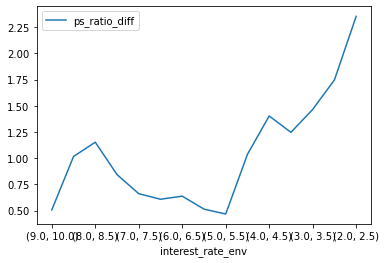

In [223]:
ps_ratio_diff = []
ir_envs = [(9.0, 10.0)]
start = 9.0
while start >= 2.5:
    ir_envs.append((start - 0.5, start))
    start = start - 0.5
ir_envs.append((0, 2.0))
for ir_env in ir_envs:
    low, high = ir_env
    lg_subset = lg_above_40[(lg_above_40['bbb_interest_rate'] > low) & (lg_above_40['bbb_interest_rate'] <= high)]
    hg_subset = hg_below_40[(hg_below_40['bbb_interest_rate'] > low) & (hg_below_40['bbb_interest_rate'] <= high)]
    diff = hg_subset['PS_Ratio'].mean() / lg_subset['PS_Ratio'].mean()
    ps_ratio_diff.append(diff)
df = pd.DataFrame(list(zip(ir_envs, ps_ratio_diff)), columns = ['interest_rate_env', 'ps_ratio_diff'])
df.plot(x="interest_rate_env", y="ps_ratio_diff")


In [209]:
# Playing around with data
ts_group = full_data[(full_data['ggroup'] == 5010)]
ts_group = ts_group[(ts_group['revtq'] >= 15000000)]

high_growth = ts_group[(ts_group['RevenueGrowthRate'] >= 0.30)]
mid_growth = ts_group[(ts_group['RevenueGrowthRate'] < 0.30) & (ts_group['RevenueGrowthRate'] >= 0.20)]
low_growth = ts_group[(ts_group['RevenueGrowthRate'] < 0.20)]

print('Telecommunication Services')
print('+ 30% Revenue Growth')
print(high_growth['PS_Ratio'].describe())
print('+ 20% Revenue Growth')
print(mid_growth['PS_Ratio'].describe())
print('+ < 20% Revenue Growth')
print(low_growth['PS_Ratio'].describe())






Telecommunication Services
+ 30% Revenue Growth
count    1544.000000
mean        7.352738
std        13.327133
min         0.001538
25%         0.650443
50%         3.539815
75%         8.565937
max       226.735744
Name: PS_Ratio, dtype: float64
+ 20% Revenue Growth
count    635.000000
mean       5.616433
std       11.468833
min        0.003023
25%        0.679412
50%        2.850429
75%        7.336221
max      185.014640
Name: PS_Ratio, dtype: float64
+ < 20% Revenue Growth
count    5405.000000
mean        4.468609
std         8.610385
min         0.000494
25%         0.593998
50%         2.302813
75%         5.894655
max       252.626889
Name: PS_Ratio, dtype: float64
